#### Visualizing the local sensitivity analysis

In [118]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [120]:
# Extract the data from the calculation
df_answers = pd.read_csv('data/ofat_answers.csv')
df_questions = pd.read_csv('data/ofat_questions.csv')
df_reputation = pd.read_csv('data/ofat_reputation.csv')
df_upvotes = pd.read_csv('data/ofat_upvotes.csv')

In [121]:
# Convert the list of strings to list of int/float
params = ['bias', 'treshold', 'mu_p_ask', 'mu_p_answer', 'mu_p_upvote', 'mu_p_active']
for param in params:
    for i in range(15):
        # Answers
        str_list = df_answers[param][i]
        list_str = str_list.strip('][').split(',')
        df_answers.at[i, param] = [int(j) for j in list_str]

        # Questions
        str_list = df_questions[param][i]
        list_str = str_list.strip('][').split(',')
        df_questions.at[i, param] = [int(j) for j in list_str]

        # Upvotes
        str_list = df_upvotes[param][i]
        list_str = str_list.strip('][').split(',')
        df_upvotes.at[i, param] = [float(j) for j in list_str]

        # Reputation
        str_list = df_reputation[param][i]
        list_str = str_list.strip('][').split(',')
        df_reputation.at[i, param] = [float(j) for j in list_str]      

In [122]:
# Define the x-axis of the plots
n_samples = 15

x_mu = np.linspace(0, 1, num=n_samples)
x = np.linspace(0, 40, num=n_samples, dtype=int)

#### Plot

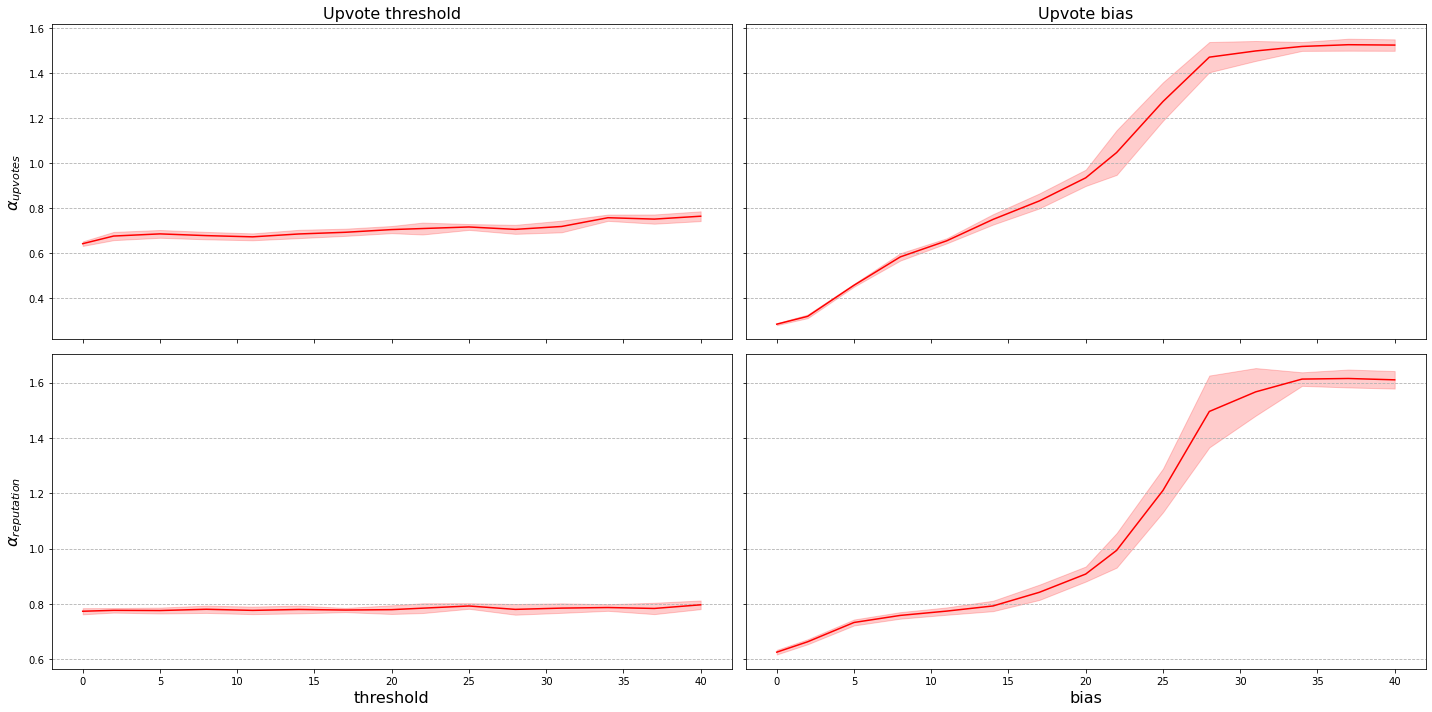

In [163]:
fig, axs = plt.subplots(2, 2, figsize = (20,10), sharey='row', sharex=True)

axs[0][0].plot(x, [-1 * np.average(df_upvotes['treshold'][i]) for i in range(n_samples)], color = 'red')
axs[0][0].fill_between(x, np.array([-1 * np.average(df_upvotes['treshold'][i]) for i in range(n_samples)]) - np.array([np.std(df_upvotes['treshold'][i]) for i in range(n_samples)]), \
    np.array([-1 * np.average(df_upvotes['treshold'][i]) for i in range(n_samples)]) + np.array([np.std(df_upvotes['treshold'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)
axs[1][0].plot(x, [-1 * np.average(df_reputation['treshold'][i]) for i in range(n_samples)], color = 'red')
axs[1][0].fill_between(x, np.array([-1 * np.average(df_reputation['treshold'][i]) for i in range(n_samples)]) - np.array([np.std(df_reputation['treshold'][i]) for i in range(n_samples)]), \
    np.array([-1 * np.average(df_reputation['treshold'][i]) for i in range(n_samples)]) + np.array([np.std(df_reputation['treshold'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)

axs[0][1].plot(x, [-1 * np.average(df_upvotes['bias'][i]) for i in range(n_samples)], color = 'red')
axs[0][1].fill_between(x, np.array([-1 * np.average(df_upvotes['bias'][i]) for i in range(n_samples)]) - np.array([np.std(df_upvotes['bias'][i]) for i in range(n_samples)]), \
    np.array([-1 * np.average(df_upvotes['bias'][i]) for i in range(n_samples)]) + np.array([np.std(df_upvotes['bias'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)
axs[1][1].plot(x, [-1 * np.average(df_reputation['bias'][i]) for i in range(n_samples)], color = 'red')
axs[1][1].fill_between(x, np.array([-1 * np.average(df_reputation['bias'][i]) for i in range(n_samples)]) - np.array([np.std(df_reputation['bias'][i]) for i in range(n_samples)]), \
    np.array([-1 * np.average(df_reputation['bias'][i]) for i in range(n_samples)]) + np.array([np.std(df_reputation['bias'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)

axs[0][0].set_title('Upvote threshold', fontsize = 16)
axs[0][1].set_title('Upvote bias', fontsize = 16)

axs[1][0].set_xlabel('threshold', fontsize = 16)
axs[1][1].set_xlabel('bias', fontsize = 16)

axs[0][0].set_ylabel(r'$\alpha_{upvotes}$', fontsize = 16)
axs[1][0].set_ylabel(r'$\alpha_{reputation}$', fontsize = 16)

for ax in axs.flat:
    ax.yaxis.grid(True, linestyle = 'dashed')

plt.tight_layout()
plt.savefig('local_sa_1.pdf')
plt.show()

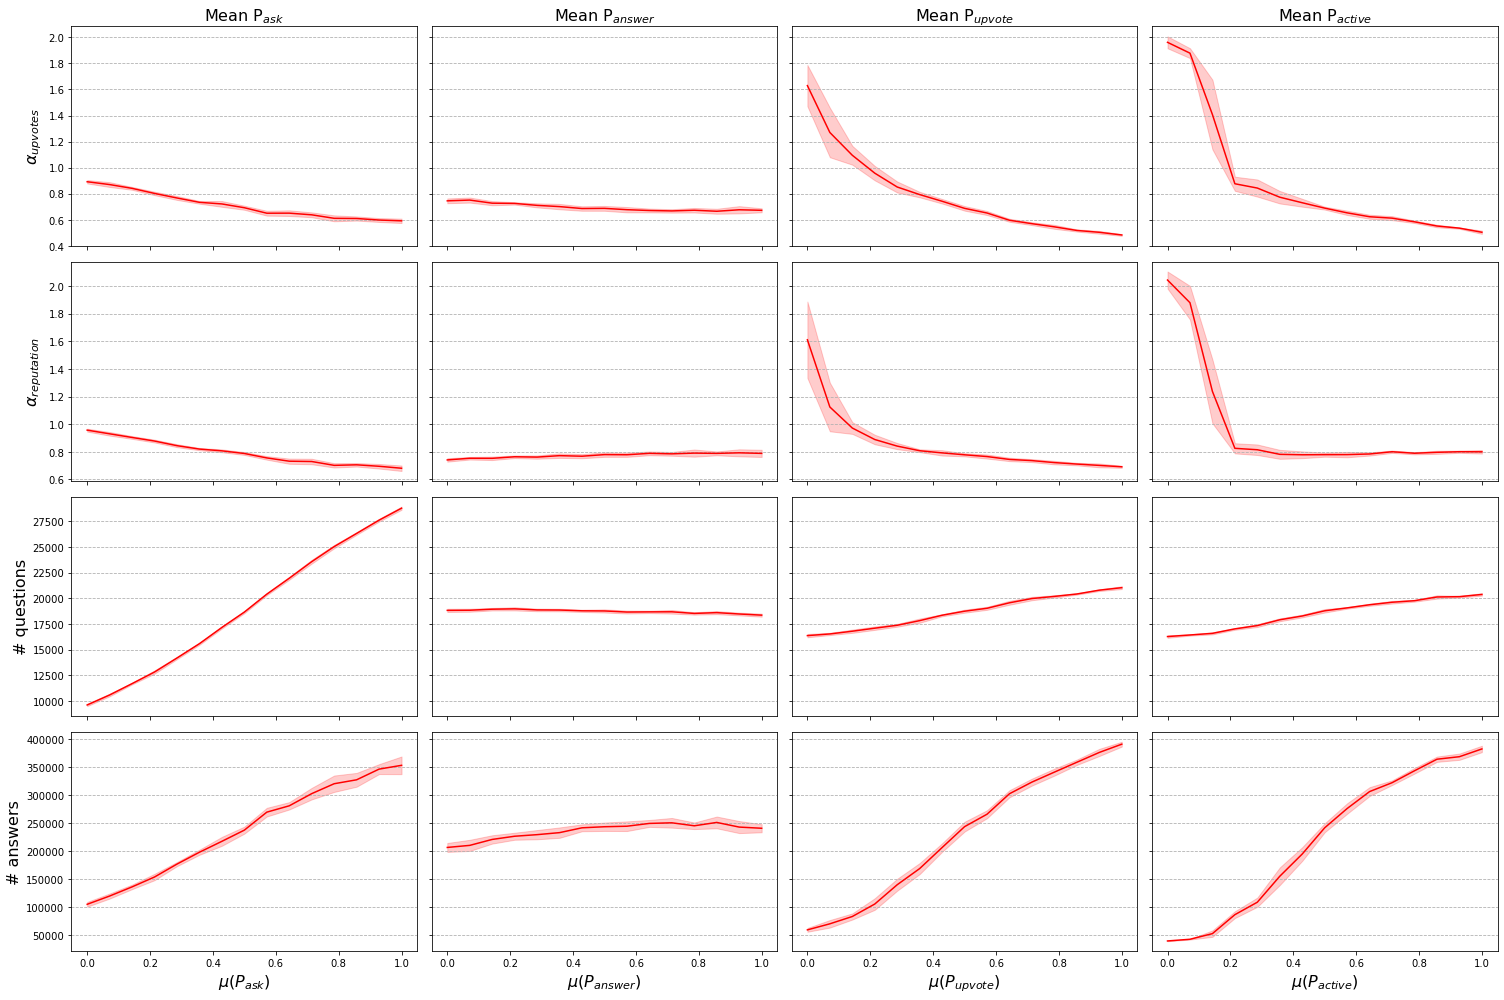

In [166]:
fig, axs = plt.subplots(4, 4, figsize = (21,14), sharey='row', sharex=True)

axs[0][0].plot(x_mu, [-1 * np.average(df_upvotes['mu_p_ask'][i]) for i in range(n_samples)], color = 'red')
axs[0][0].fill_between(x_mu, np.array([-1 * np.average(df_upvotes['mu_p_ask'][i]) for i in range(n_samples)]) - np.array([np.std(df_upvotes['mu_p_ask'][i]) for i in range(n_samples)]), \
    np.array([-1 * np.average(df_upvotes['mu_p_ask'][i]) for i in range(n_samples)]) + np.array([np.std(df_upvotes['mu_p_ask'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)
axs[1][0].plot(x_mu, [-1 * np.average(df_reputation['mu_p_ask'][i]) for i in range(n_samples)], color = 'red')
axs[1][0].fill_between(x_mu, np.array([-1 * np.average(df_reputation['mu_p_ask'][i]) for i in range(n_samples)]) - np.array([np.std(df_reputation['mu_p_ask'][i]) for i in range(n_samples)]), \
    np.array([-1 * np.average(df_reputation['mu_p_ask'][i]) for i in range(n_samples)]) + np.array([np.std(df_reputation['mu_p_ask'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)
axs[2][0].plot(x_mu, [np.average(df_questions['mu_p_ask'][i]) for i in range(n_samples)], color = 'red')
axs[2][0].fill_between(x_mu, np.array([np.average(df_questions['mu_p_ask'][i]) for i in range(n_samples)]) - np.array([np.std(df_questions['mu_p_ask'][i]) for i in range(n_samples)]), \
    np.array([np.average(df_questions['mu_p_ask'][i]) for i in range(n_samples)]) + np.array([np.std(df_questions['mu_p_ask'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)
axs[3][0].plot(x_mu, [np.average(df_answers['mu_p_ask'][i]) for i in range(n_samples)], color = 'red')
axs[3][0].fill_between(x_mu, np.array([np.average(df_answers['mu_p_ask'][i]) for i in range(n_samples)]) - np.array([np.std(df_answers['mu_p_ask'][i]) for i in range(n_samples)]), \
    np.array([np.average(df_answers['mu_p_ask'][i]) for i in range(n_samples)]) + np.array([np.std(df_answers['mu_p_ask'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)

axs[0][1].plot(x_mu, [-1 * np.average(df_upvotes['mu_p_answer'][i]) for i in range(n_samples)], color = 'red')
axs[0][1].fill_between(x_mu, np.array([-1 * np.average(df_upvotes['mu_p_answer'][i]) for i in range(n_samples)]) - np.array([np.std(df_upvotes['mu_p_answer'][i]) for i in range(n_samples)]), \
    np.array([-1 * np.average(df_upvotes['mu_p_answer'][i]) for i in range(n_samples)]) + np.array([np.std(df_upvotes['mu_p_answer'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)
axs[1][1].plot(x_mu, [-1 * np.average(df_reputation['mu_p_answer'][i]) for i in range(n_samples)], color = 'red')
axs[1][1].fill_between(x_mu, np.array([-1 * np.average(df_reputation['mu_p_answer'][i]) for i in range(n_samples)]) - np.array([np.std(df_reputation['mu_p_answer'][i]) for i in range(n_samples)]), \
    np.array([-1 * np.average(df_reputation['mu_p_answer'][i]) for i in range(n_samples)]) + np.array([np.std(df_reputation['mu_p_answer'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)
axs[2][1].plot(x_mu, [np.average(df_questions['mu_p_answer'][i]) for i in range(n_samples)], color = 'red')
axs[2][1].fill_between(x_mu, np.array([np.average(df_questions['mu_p_answer'][i]) for i in range(n_samples)]) - np.array([np.std(df_questions['mu_p_answer'][i]) for i in range(n_samples)]), \
    np.array([np.average(df_questions['mu_p_answer'][i]) for i in range(n_samples)]) + np.array([np.std(df_questions['mu_p_answer'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)
axs[3][1].plot(x_mu, [np.average(df_answers['mu_p_answer'][i]) for i in range(n_samples)], color = 'red')
axs[3][1].fill_between(x_mu, np.array([np.average(df_answers['mu_p_answer'][i]) for i in range(n_samples)]) - np.array([np.std(df_answers['mu_p_answer'][i]) for i in range(n_samples)]), \
    np.array([np.average(df_answers['mu_p_answer'][i]) for i in range(n_samples)]) + np.array([np.std(df_answers['mu_p_answer'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)

axs[0][2].plot(x_mu, [-1 * np.average(df_upvotes['mu_p_upvote'][i]) for i in range(n_samples)], color = 'red')
axs[0][2].fill_between(x_mu, np.array([-1 * np.average(df_upvotes['mu_p_upvote'][i]) for i in range(n_samples)]) - np.array([np.std(df_upvotes['mu_p_upvote'][i]) for i in range(n_samples)]), \
    np.array([-1 * np.average(df_upvotes['mu_p_upvote'][i]) for i in range(n_samples)]) + np.array([np.std(df_upvotes['mu_p_upvote'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)
axs[1][2].plot(x_mu, [-1 * np.average(df_reputation['mu_p_upvote'][i]) for i in range(n_samples)], color = 'red')
axs[1][2].fill_between(x_mu, np.array([-1 * np.average(df_reputation['mu_p_upvote'][i]) for i in range(n_samples)]) - np.array([np.std(df_reputation['mu_p_upvote'][i]) for i in range(n_samples)]), \
    np.array([-1 * np.average(df_reputation['mu_p_upvote'][i]) for i in range(n_samples)]) + np.array([np.std(df_reputation['mu_p_upvote'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)
axs[2][2].plot(x_mu, [np.average(df_questions['mu_p_upvote'][i]) for i in range(n_samples)], color = 'red')
axs[2][2].fill_between(x_mu, np.array([np.average(df_questions['mu_p_upvote'][i]) for i in range(n_samples)]) - np.array([np.std(df_questions['mu_p_upvote'][i]) for i in range(n_samples)]), \
    np.array([np.average(df_questions['mu_p_upvote'][i]) for i in range(n_samples)]) + np.array([np.std(df_questions['mu_p_upvote'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)
axs[3][2].plot(x_mu, [np.average(df_answers['mu_p_upvote'][i]) for i in range(n_samples)], color = 'red')
axs[3][2].fill_between(x_mu, np.array([np.average(df_answers['mu_p_upvote'][i]) for i in range(n_samples)]) - np.array([np.std(df_answers['mu_p_upvote'][i]) for i in range(n_samples)]), \
    np.array([np.average(df_answers['mu_p_upvote'][i]) for i in range(n_samples)]) + np.array([np.std(df_answers['mu_p_upvote'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)

axs[0][3].plot(x_mu, [-1 * np.average(df_upvotes['mu_p_active'][i]) for i in range(n_samples)], color = 'red')
axs[0][3].fill_between(x_mu, np.array([-1 * np.average(df_upvotes['mu_p_active'][i]) for i in range(n_samples)]) - np.array([np.std(df_upvotes['mu_p_active'][i]) for i in range(n_samples)]), \
    np.array([-1 * np.average(df_upvotes['mu_p_active'][i]) for i in range(n_samples)]) + np.array([np.std(df_upvotes['mu_p_active'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)
axs[1][3].plot(x_mu, [-1 * np.average(df_reputation['mu_p_active'][i]) for i in range(n_samples)], color = 'red')
axs[1][3].fill_between(x_mu, np.array([-1 * np.average(df_reputation['mu_p_active'][i]) for i in range(n_samples)]) - np.array([np.std(df_reputation['mu_p_active'][i]) for i in range(n_samples)]), \
    np.array([-1 * np.average(df_reputation['mu_p_active'][i]) for i in range(n_samples)]) + np.array([np.std(df_reputation['mu_p_active'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)
axs[2][3].plot(x_mu, [np.average(df_questions['mu_p_active'][i]) for i in range(n_samples)], color = 'red')
axs[2][3].fill_between(x_mu, np.array([np.average(df_questions['mu_p_active'][i]) for i in range(n_samples)]) - np.array([np.std(df_questions['mu_p_active'][i]) for i in range(n_samples)]), \
    np.array([np.average(df_questions['mu_p_active'][i]) for i in range(n_samples)]) + np.array([np.std(df_questions['mu_p_active'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)
axs[3][3].plot(x_mu, [np.average(df_answers['mu_p_active'][i]) for i in range(n_samples)], color = 'red')
axs[3][3].fill_between(x_mu, np.array([np.average(df_answers['mu_p_active'][i]) for i in range(n_samples)]) - np.array([np.std(df_answers['mu_p_active'][i]) for i in range(n_samples)]), \
    np.array([np.average(df_answers['mu_p_active'][i]) for i in range(n_samples)]) + np.array([np.std(df_answers['mu_p_active'][i]) for i in range(n_samples)]), color = 'red', alpha=0.2)

axs[0][0].set_title('Mean P$_{ask}$', fontsize = 16)
axs[0][1].set_title('Mean P$_{answer}$', fontsize = 16)
axs[0][2].set_title('Mean P$_{upvote}$', fontsize = 16)
axs[0][3].set_title('Mean P$_{active}$', fontsize = 16)

axs[3][0].set_xlabel('$\mu(P_{ask})$', fontsize = 16)
axs[3][1].set_xlabel('$\mu(P_{answer})$', fontsize = 16)
axs[3][2].set_xlabel('$\mu(P_{upvote})$', fontsize = 16)
axs[3][3].set_xlabel('$\mu(P_{active})$', fontsize = 16)

axs[0][0].set_ylabel(r'$\alpha_{upvotes}$', fontsize = 16)
axs[1][0].set_ylabel(r'$\alpha_{reputation}$', fontsize = 16)
axs[2][0].set_ylabel('# questions', fontsize = 16)
axs[3][0].set_ylabel('# answers', fontsize = 16)

for ax in axs.flat:
    ax.yaxis.grid(True, linestyle = 'dashed')

plt.tight_layout()
plt.savefig('local_sa_mu.pdf')
plt.show()